In [2]:
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
forestfires=pd.read_csv("D:\\ExcelR Assignments\\SVM\\forestfires.csv")
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


<AxesSubplot:xlabel='size_category'>

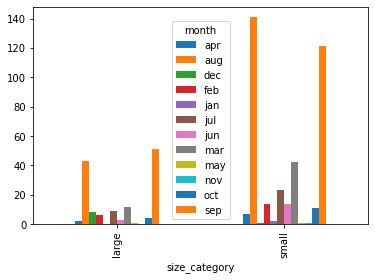

In [4]:
pd.crosstab(forestfires.size_category,forestfires.month).plot(kind="bar")

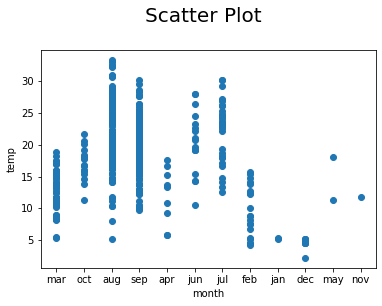

In [7]:
import matplotlib.pyplot as plt
plt.xlabel("month")
plt.ylabel("temp")
plt.suptitle("Scatter Plot",size=20,y=1.03)
plt.scatter(forestfires.month,forestfires.temp)

<AxesSubplot:ylabel='size_category'>

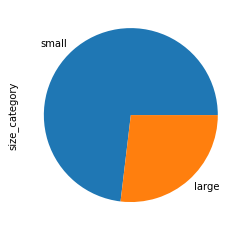

In [5]:
forestfires.size_category.value_counts().plot(kind="pie")

In [ ]:
plt.xlabel("mpg")
plt.ylabel("disp")
plt.suptitle("Scatter Plot",size=20,y=1.03)
plt.scatter(mtcars.mpg,mtcars.disp)

In [29]:
X=forestfires.iloc[:,2:28]
Y=forestfires.iloc[:,28]

In [30]:
X.head()

,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
Y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [33]:
X_train.shape,Y_train.shape, X_test.shape, Y_test.shape

((361, 26), (361,), (156, 26), (156,))

In [ ]:
#Gamma=0.22

In [34]:
svc = SVC(gamma= 0.22)
svc.fit(X_train, Y_train)
score_svc = svc.score(X_test, Y_test)
print("The accuracy of SVC is ", score_svc)

The accuracy of SVC is  0.7371794871794872


In [ ]:
#Gamma=0.33

In [35]:
svc = SVC(gamma=0.33)
svc.fit(X_train, Y_train)
score_svc = svc.score(X_test, Y_test)
print('the accuracy of SVC is', score_svc)

the accuracy of SVC is 0.7371794871794872


In [36]:
svc_radical = svm.SVC(kernel='poly', C=1, gamma=0.33)
svc_radical.fit(X_train,Y_train)
score_svc_radical = svc_radical.score(X_test, Y_test)
print('The accuracy of poly SVC model is ', score_svc_radical)

The accuracy of poly SVC model is  0.9807692307692307


In [37]:
clf = SVC(kernel='poly', C=1, gamma=0.33)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) *100
print('Accuracy=', acc)
confusion_matrix(Y_test, y_pred)

Accuracy= 98.07692307692307


array([[ 39,   3],
       [  0, 114]], dtype=int64)

In [39]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       large       1.00      0.93      0.96        42
       small       0.97      1.00      0.99       114

    accuracy                           0.98       156
   macro avg       0.99      0.96      0.97       156
weighted avg       0.98      0.98      0.98       156

